<a href="https://colab.research.google.com/github/plaban1981/open_cv_projects/blob/main/BarcodeReader_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


A **barcode** is a method of representing data in a visual and machine readable form, it consists of bars and spaces. Today, we see barcodes everywhere, especially in products in supermarkets.

Barcodes can be read by an optical barcode scanner, but in this tutorial, we will make a script in Python that is able to read and decode barcodes, as well as drawing where they're located in a given image.

Before you can !pip install pyzbar, you need to install libzbar with this command.

In [7]:
!apt install libzbar0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libv4l-0 libv4lconvert0
The following NEW packages will be installed:
  libv4l-0 libv4lconvert0 libzbar0
0 upgraded, 3 newly installed, 0 to remove and 11 not upgraded.
Need to get 193 kB of archives.
After this operation, 760 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4lconvert0 amd64 1.14.2-1 [76.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4l-0 amd64 1.14.2-1 [41.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libzbar0 amd64 0.10+doc-10.1build2 [75.7 kB]
Fetched 193 kB in 1s (182 kB/s)
Selecting previously unselected package libv4lconvert0:amd64.
(Reading database ... 144628 files and directories currently installed.)
Preparing to unpack .../libv4lconvert0_1.14.2-1_amd64.deb ...
Unpacking libv4lconvert0:amd64 (1.14.2-1) ...
Selecting p

In [8]:
!pip install pyzbar


Import Libraries

In [9]:
from pyzbar import pyzbar
import cv2

Decode function takes the barcode image as an input and performs the following :
* read barcode image
* decode the barcode
* draw a rectangle around the barcode
* return useful information contained in each barcode


In [26]:
def decode(image):
    # decodes all barcodes from an image
    decoded_objects = pyzbar.decode(image)
    for obj in decoded_objects:
        # draw the barcode
        print("detected barcode:", obj)
        image = draw_barcode(obj, image)
        # print barcode type & data
        print("Type:", obj.type)
        print("Data:", obj.data)
        print()
    return image



In [25]:
def draw_barcode(decoded, image):
  
    image = cv2.rectangle(image, 
                          (decoded.rect.left, decoded.rect.top), 
                          (decoded.rect.left + decoded.rect.width, decoded.rect.top + decoded.rect.height),
                          color=(255, 0, 0),
                          thickness=15)
    return image

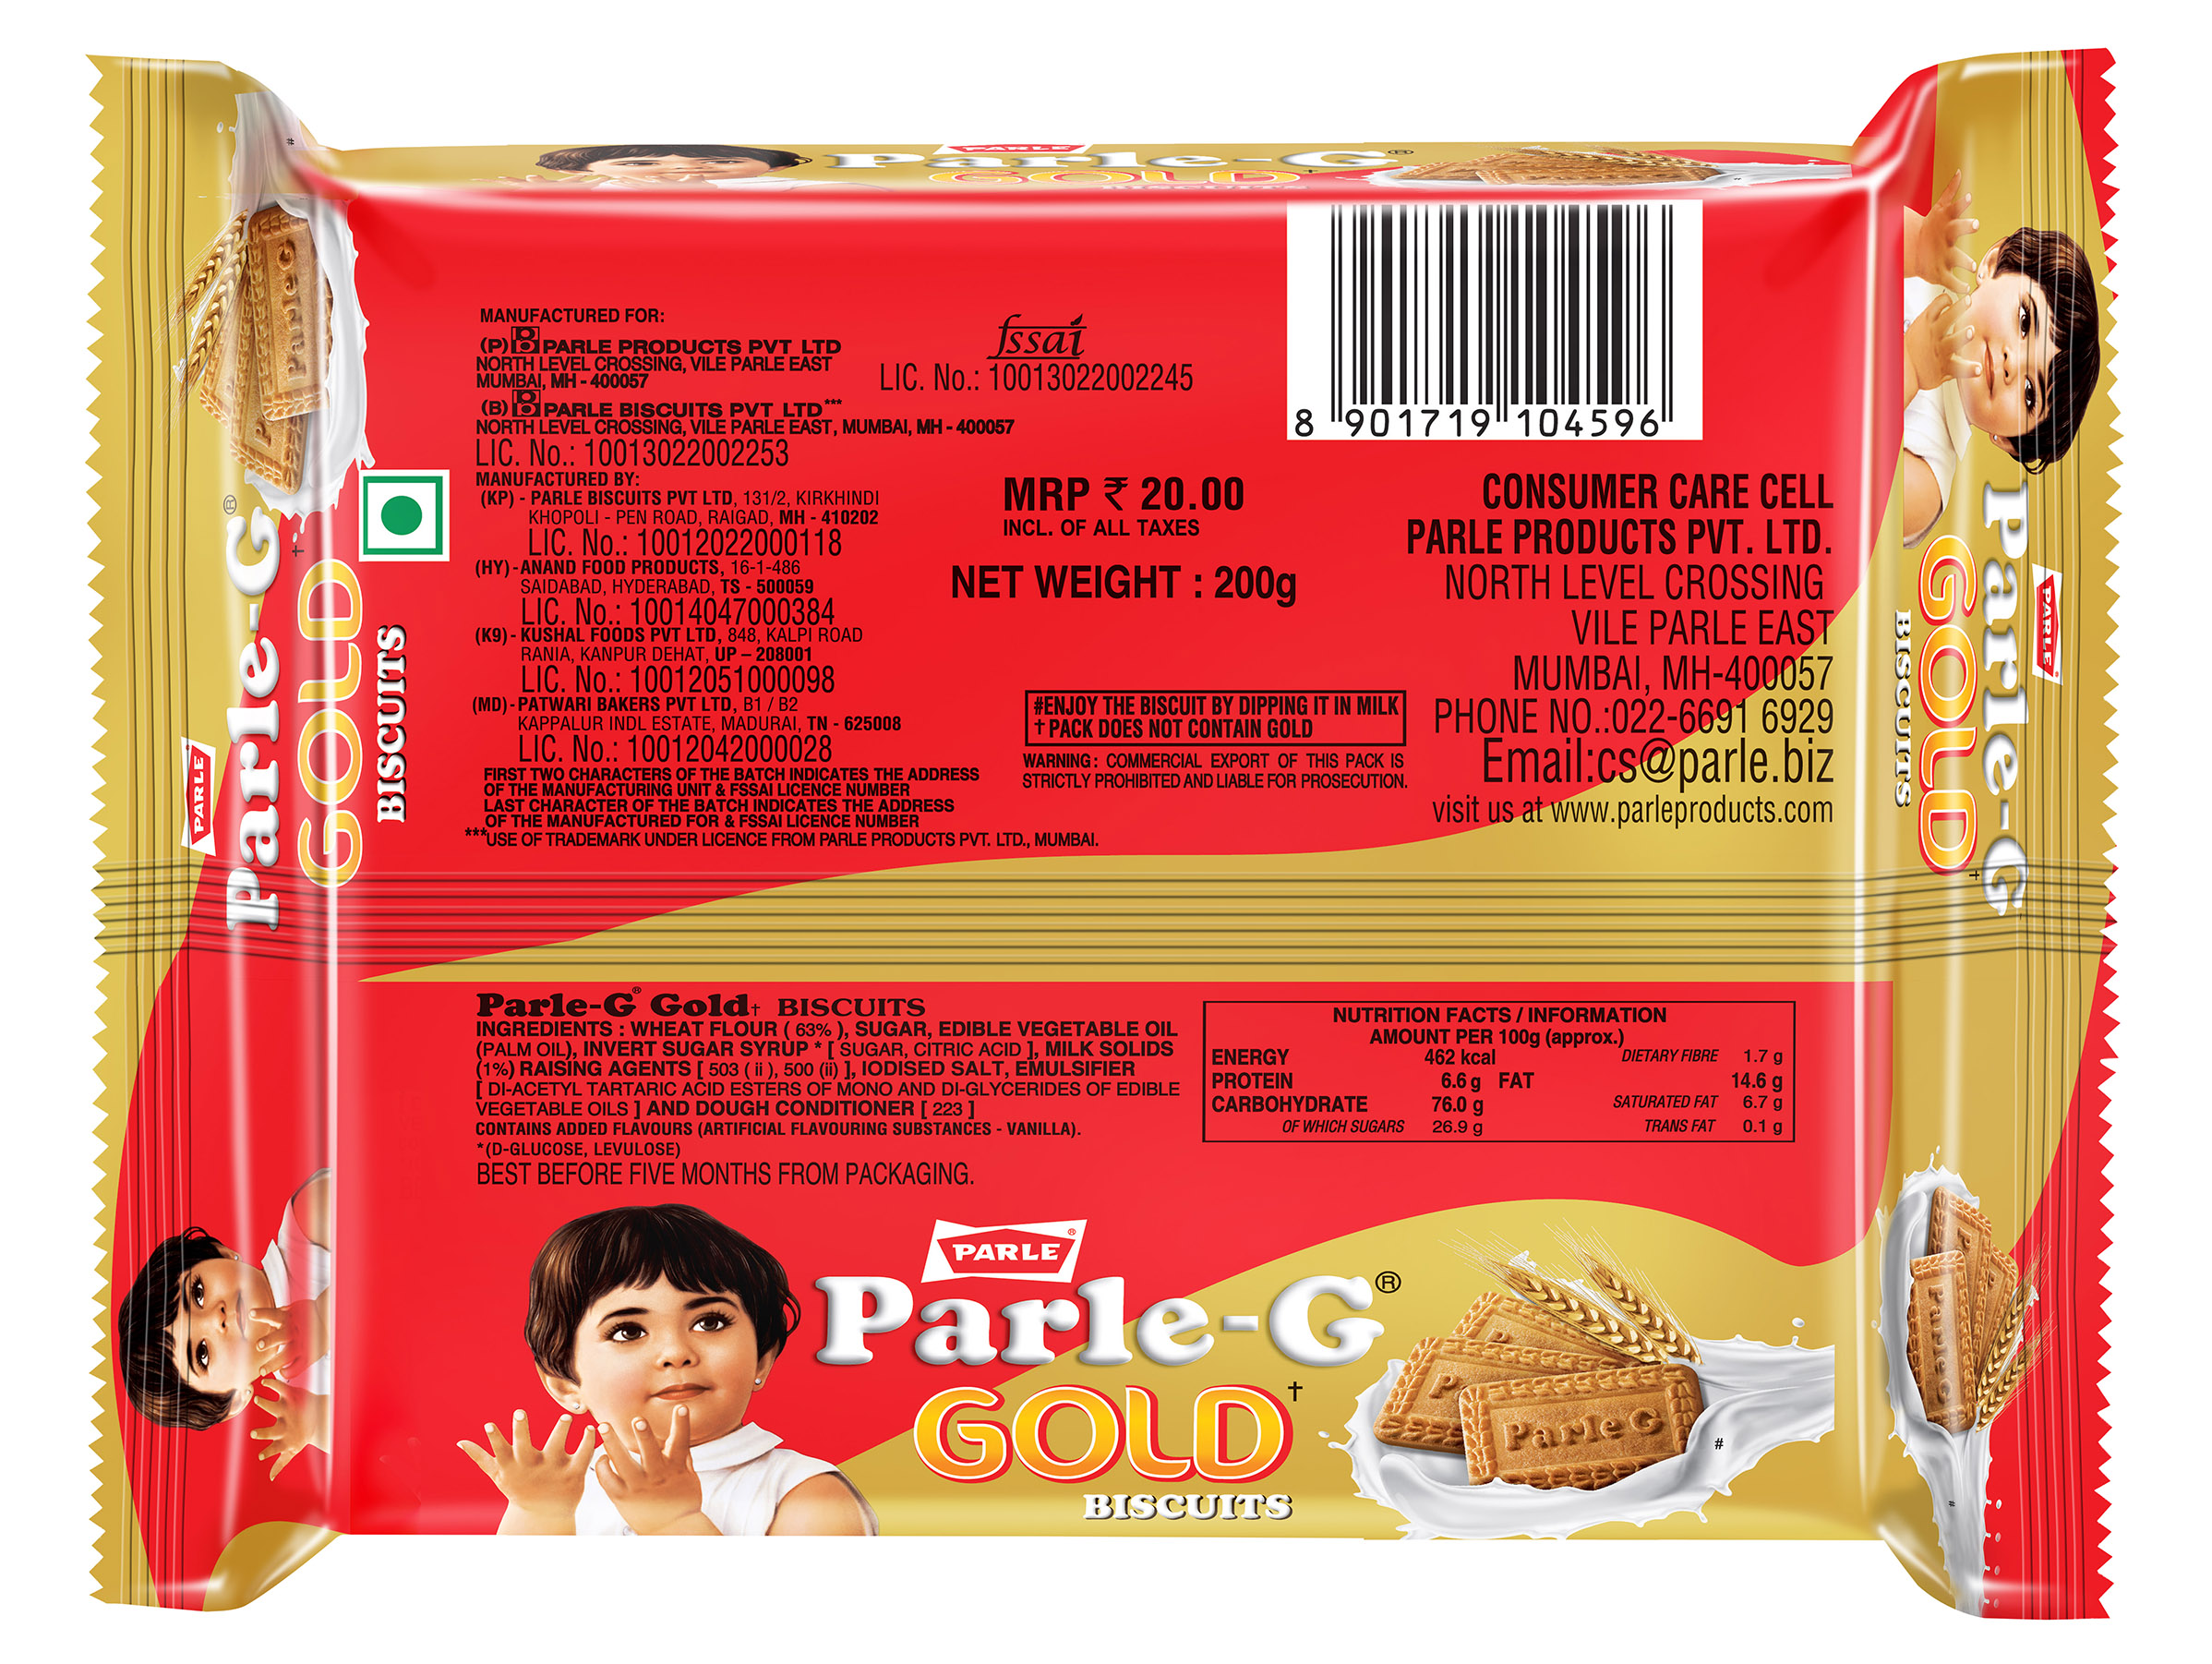

In [33]:
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/parleg.jpg")
cv2_imshow(img)

detected barcode: Decoded(data=b'8901719104596', type='EAN13', rect=Rect(left=1442, top=222, width=369, height=215), polygon=[Point(x=1442, y=273), Point(x=1442, y=437), Point(x=1621, y=437), Point(x=1811, y=436), Point(x=1811, y=222), Point(x=1632, y=222), Point(x=1443, y=223)])
Type: EAN13
Data: b'8901719104596'



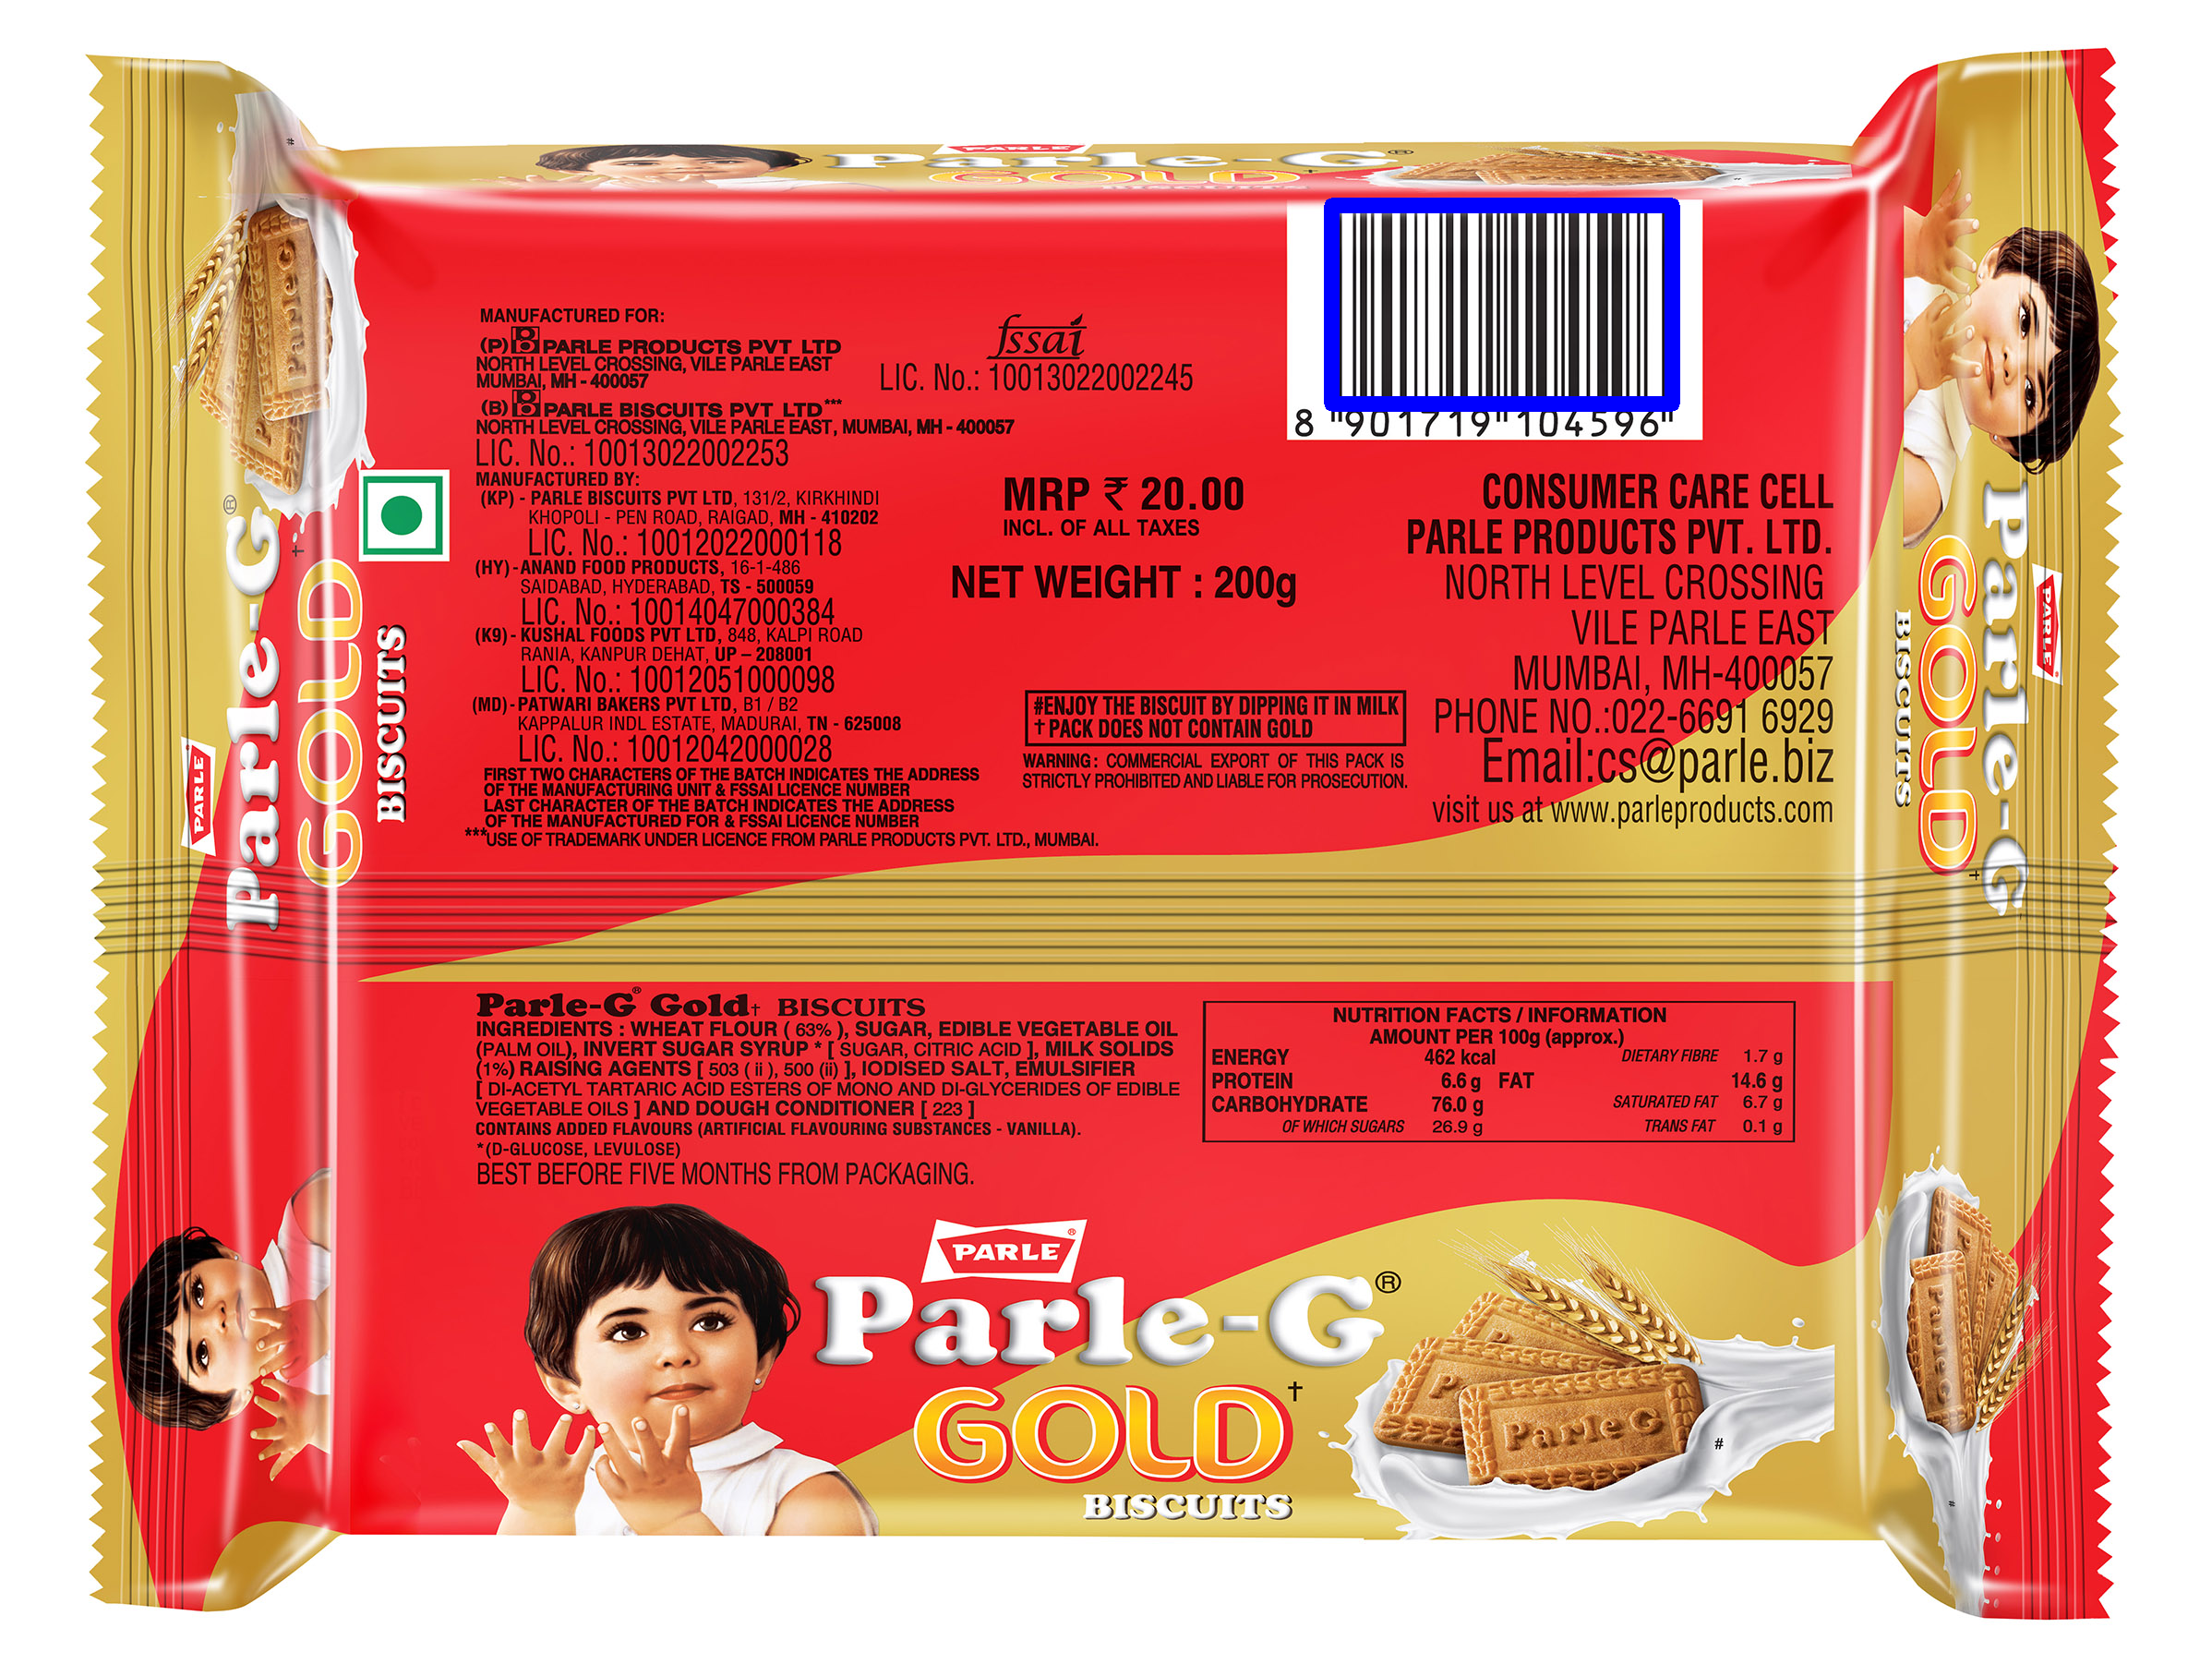

In [34]:
img_decoded = decode(img)
cv2_imshow(img_decoded)

#### pyzbar.decode() function  exactly identifies the barcode present in the image and returns the data contained in the barcode, type of barcode as well as the location points of the barcode

In [28]:
from glob import glob

In [29]:
barcodes = glob("/content/drive/My Drive/Adrain/barcodes/*.png")

In [30]:
barcodes

['/content/drive/My Drive/Adrain/barcodes/barcodeImage1.png',
 '/content/drive/My Drive/Adrain/barcodes/barcodeImage2.png',
 '/content/drive/My Drive/Adrain/barcodes/barcodeImage3.png']

detected barcode: Decoded(data=b'7891000040874', type='EAN13', rect=Rect(left=47, top=45, width=286, height=100), polygon=[Point(x=47, y=45), Point(x=47, y=145), Point(x=185, y=145), Point(x=333, y=144), Point(x=333, y=46)])
Type: EAN13
Data: b'7891000040874'



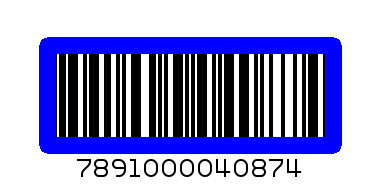

detected barcode: Decoded(data=b'6154000009304', type='EAN13', rect=Rect(left=47, top=45, width=286, height=100), polygon=[Point(x=47, y=45), Point(x=47, y=145), Point(x=185, y=145), Point(x=333, y=144), Point(x=333, y=46)])
Type: EAN13
Data: b'6154000009304'



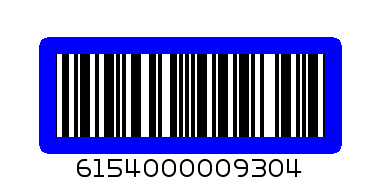

detected barcode: Decoded(data=b'5010006100777', type='EAN13', rect=Rect(left=40, top=37, width=239, height=85), polygon=[Point(x=40, y=37), Point(x=40, y=121), Point(x=163, y=122), Point(x=279, y=122), Point(x=278, y=38)])
Type: EAN13
Data: b'5010006100777'



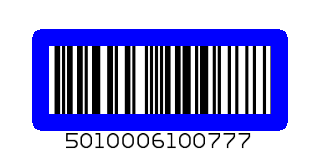

In [31]:
for barcode_image in barcodes:
  #load the  image to opencv
  img = cv2.imread(barcode_image)
  #decode the barcode image using pyzbar.decode()
  img = decode(img)
  cv2_imshow(img)